In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB


import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [2]:
df=pd.read_csv("pricerunner_aggregate.csv")

In [3]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
df.shape

(35311, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Product ID       35311 non-null  int64 
 1   Product Title    35311 non-null  object
 2    Merchant ID     35311 non-null  int64 
 3    Cluster ID      35311 non-null  int64 
 4    Cluster Label   35311 non-null  object
 5    Category ID     35311 non-null  int64 
 6    Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [6]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      35311 non-null  int64 
 1   Product Title   35311 non-null  object
 2   Merchant ID     35311 non-null  int64 
 3   Cluster ID      35311 non-null  int64 
 4   Cluster Label   35311 non-null  object
 5   Category ID     35311 non-null  int64 
 6   Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


# Clustering

In [7]:
X_cluster = df[['Merchant ID', 'Category ID']]

In [8]:
scaler = StandardScaler()
X_cluster_standardized = scaler.fit_transform(X_cluster)

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_cluster_standardized)
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [10]:
print(kmeans.n_clusters,"\n""\n",kmeans.cluster_centers_,"\n""\n",kmeans.inertia_)
#inertia is a measure of the total squared distance between cluster centers and data points.

4 

 [[-0.86860065  0.44954623]
 [ 1.53803678  0.67763866]
 [-0.64410723 -1.25438647]
 [ 0.07067748  0.71203412]] 

 10415.914890836724


In [11]:
kmeans = KMeans(random_state=42)
ssd = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_cluster_standardized)
    ssd.append(kmeans.inertia_)

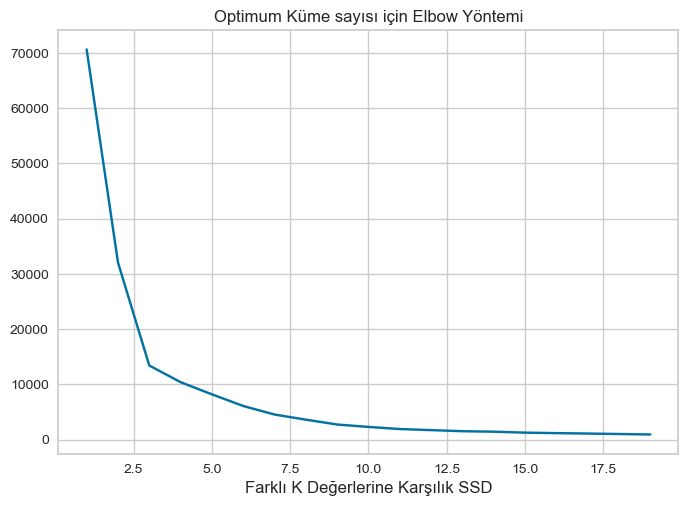

In [12]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSD")#Sum of Squared Distances
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

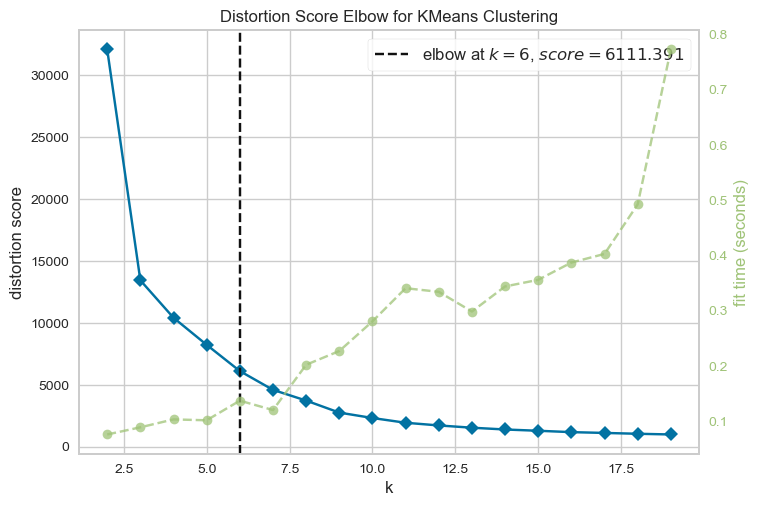

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X_cluster_standardized)
elbow.show()

In [14]:
elbow.elbow_value_

6

In [15]:
kmeans = KMeans(n_clusters=elbow.elbow_value_,random_state=42).fit(X_cluster_standardized)
clusters_kmeans = kmeans.labels_
df["Cluster"] = clusters_kmeans

In [16]:
df.tail(50)

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label,Cluster
35261,47300,aeg sks71840s0 integrated 177cm high in column...,328,47460,AEG SKS71840S0,2623,Fridges,1
35262,47301,aeg s62900ksw0 ultra energy efficient 1.6m tal...,293,47461,AEG S62900KSW0 White,2623,Fridges,1
35263,47302,147litre integrated in column larder fridge a,123,47462,AEG SKS58800S0 White,2623,Fridges,5
35264,47303,aeg s71700tsx0 fridge,332,47463,AEG S71700TSX0 Silver Silver,2623,Fridges,1
35265,47306,226litre integrated larder fridge class a white,123,47466,Bosch KIR24A65 Integrated,2623,Fridges,5
35266,47307,samsung rfg23uers1 fridge freezer american sty...,131,47467,Samsung RR82FERS1 Stainless Steel,2623,Fridges,5
35267,47308,beko b 1751 einbau k hlschrank mit 4,119,47468,Beko B 1751 Integrated,2623,Fridges,5
35268,47309,retro fab28qsg fridge,332,47469,Smeg FAB28QSG England Flag Retro,2623,Fridges,1
35269,47310,constructa k hlautomat integrierbar ck60251,298,47471,Constructa CK60251 Integrated,2623,Fridges,1
35270,47311,whirlpool arg 913/a fridge freezer,324,47472,Whirlpool ARG913 White,2623,Fridges,1


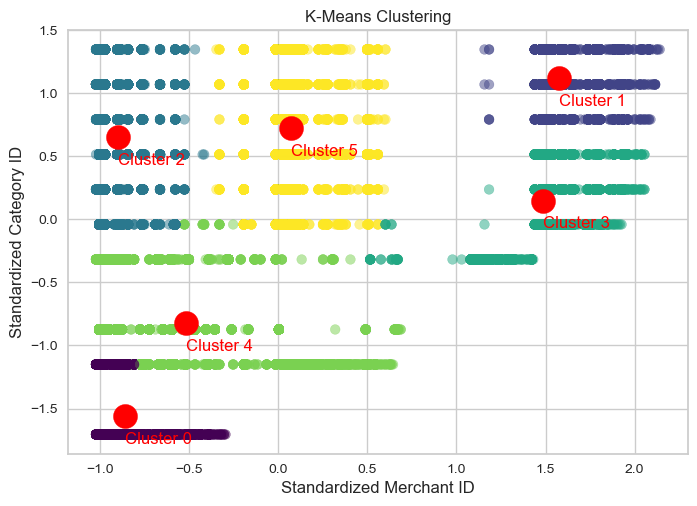

In [17]:
plt.scatter(X_cluster_standardized[:, 0], X_cluster_standardized[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.5)
for cluster_center, label in zip(kmeans.cluster_centers_, range(len(kmeans.cluster_centers_))):
    plt.scatter(cluster_center[0], cluster_center[1], s=300, c='red', label=f'Cluster Center {label}')
    plt.annotate(f'Cluster {label}', (cluster_center[0], cluster_center[1]), xytext=(0, -20), textcoords='offset points',fontsize=12, color='red')

plt.title('K-Means Clustering')
plt.xlabel('Standardized Merchant ID')
plt.ylabel('Standardized Category ID')
plt.show()

In [18]:
category_counts = df['Category Label'].unique()
for category in category_counts:
    category_cluster_counts = df[df['Category Label'] == category]['Cluster'].value_counts()
    print(f"{category} Category:")
    print(category_cluster_counts)
    print("\n")

Mobile Phones Category:
0    4081
Name: Cluster, dtype: int64


TVs Category:
4    2143
0    1421
Name: Cluster, dtype: int64


CPUs Category:
4    3862
Name: Cluster, dtype: int64


Digital Cameras Category:
4    1778
3     919
Name: Cluster, dtype: int64


Microwaves Category:
2    1115
3     651
5     555
4      21
Name: Cluster, dtype: int64


Dishwashers Category:
3    1592
2     930
5     902
Name: Cluster, dtype: int64


Washing Machines Category:
2    1481
5    1428
3    1135
Name: Cluster, dtype: int64


Freezers Category:
1    860
5    699
2    653
Name: Cluster, dtype: int64


Fridge Freezers Category:
1    2315
5    1609
2    1577
Name: Cluster, dtype: int64


Fridges Category:
1    1822
2     896
5     866
Name: Cluster, dtype: int64




# Classification

# KNN

In [19]:
X = df['Product Title']
y = df['Category Label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = knn_classifier.predict(X_test_tfidf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.9449242531502194


In [24]:
#class_report = classification_report(y_test, y_pred_knn)
#print("Classification Report:\n", class_report)
accuracy_per_class = {}

for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred_knn[mask])
    
class_report_knn = classification_report(y_test, y_pred_knn)

for label, accuracy in accuracy_per_class.items():
    class_report_knn = f'{class_report_knn}\n\nAccuracy for {label}: {accuracy}'
    
print("Classification Report (KNN):\n", class_report_knn)

Classification Report (KNN):
                   precision    recall  f1-score   support

            CPUs       0.98      1.00      0.99       771
 Digital Cameras       0.99      1.00      0.99       542
     Dishwashers       0.90      0.95      0.93       662
        Freezers       0.77      0.83      0.80       439
 Fridge Freezers       0.93      0.90      0.92      1115
         Fridges       0.88      0.88      0.88       728
      Microwaves       0.98      0.97      0.97       469
   Mobile Phones       0.99      0.99      0.99       818
             TVs       0.98      0.98      0.98       723
Washing Machines       0.99      0.94      0.96       796

        accuracy                           0.94      7063
       macro avg       0.94      0.94      0.94      7063
    weighted avg       0.95      0.94      0.95      7063


Accuracy for Washing Machines: 0.9384422110552764

Accuracy for Digital Cameras: 0.996309963099631

Accuracy for CPUs: 0.9974059662775616

Accuracy for Fr

# SVM

In [25]:
X = df['Product Title']
y = df['Category Label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [28]:
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [29]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

Accuracy (SVM): 0.9616310349709755


In [30]:
#class_report = classification_report(y_test, y_pred_svm)
#print("Classification Report:\n", class_report)
accuracy_per_class = {}

for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred_svm[mask])
    
class_report_svm = classification_report(y_test, y_pred_svm)

for label, accuracy in accuracy_per_class.items():
    class_report_svm = f'{class_report_svm}\n\nAccuracy for {label}: {accuracy}'


print("Classification Report (SVM):\n", class_report_svm)

Classification Report (SVM):
                   precision    recall  f1-score   support

            CPUs       1.00      0.99      1.00       771
 Digital Cameras       1.00      1.00      1.00       542
     Dishwashers       0.91      0.95      0.93       662
        Freezers       0.98      0.92      0.95       439
 Fridge Freezers       0.97      0.94      0.95      1115
         Fridges       0.89      0.93      0.91       728
      Microwaves       1.00      0.95      0.97       469
   Mobile Phones       0.97      1.00      0.98       818
             TVs       0.98      0.98      0.98       723
Washing Machines       0.95      0.95      0.95       796

        accuracy                           0.96      7063
       macro avg       0.96      0.96      0.96      7063
    weighted avg       0.96      0.96      0.96      7063


Accuracy for Washing Machines: 0.9484924623115578

Accuracy for Digital Cameras: 0.9981549815498155

Accuracy for CPUs: 0.9948119325551232

Accuracy for F

# MultinomialNB

In [31]:
X = df['Product Title']
y = df['Category Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (NB):", accuracy_nb)

accuracy_per_class = {}

for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred_nb[mask])
    
class_report_nb = classification_report(y_test, y_pred_nb)

for label, accuracy in accuracy_per_class.items():
    class_report_nb = f'{class_report_nb}\n\nAccuracy for {label}: {accuracy}'


print("Classification Report (NB):\n", class_report_nb)

Accuracy (NB): 0.9392609372787767
Classification Report (NB):
                   precision    recall  f1-score   support

            CPUs       1.00      0.99      1.00       771
 Digital Cameras       0.99      1.00      1.00       542
     Dishwashers       0.98      0.95      0.97       662
        Freezers       1.00      0.53      0.69       439
 Fridge Freezers       0.77      0.98      0.86      1115
         Fridges       0.91      0.85      0.88       728
      Microwaves       1.00      0.96      0.98       469
   Mobile Phones       0.99      1.00      1.00       818
             TVs       0.99      0.99      0.99       723
Washing Machines       0.98      0.97      0.98       796

        accuracy                           0.94      7063
       macro avg       0.96      0.92      0.93      7063
    weighted avg       0.95      0.94      0.94      7063


Accuracy for Washing Machines: 0.9736180904522613

Accuracy for Digital Cameras: 0.9981549815498155

Accuracy for CPUs: 0

# Combined(MultinomialNB)

In [32]:
df['Combined Features'] = df.apply(lambda row: f"{row['Product Title']} {row['Cluster Label']}", axis=1)
X = df['Combined Features']
y = df['Category Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (NB):", accuracy_nb)

accuracy_per_class = {}

for label in set(y_test):
    mask = (y_test == label)
    accuracy_per_class[label] = accuracy_score(y_test[mask], y_pred_nb[mask])
    
class_report_nb = classification_report(y_test, y_pred_nb)

for label, accuracy in accuracy_per_class.items():
    class_report_nb = f'{class_report_nb}\n\nAccuracy for {label}: {accuracy}'


print("Classification Report (NB):\n", class_report_nb)

Accuracy (NB): 0.9498796545377318
Classification Report (NB):
                   precision    recall  f1-score   support

            CPUs       1.00      1.00      1.00       771
 Digital Cameras       1.00      0.99      1.00       542
     Dishwashers       0.98      0.95      0.96       662
        Freezers       1.00      0.59      0.75       439
 Fridge Freezers       0.79      0.99      0.88      1115
         Fridges       0.96      0.88      0.92       728
      Microwaves       0.99      0.97      0.98       469
   Mobile Phones       1.00      1.00      1.00       818
             TVs       1.00      1.00      1.00       723
Washing Machines       0.99      0.98      0.98       796

        accuracy                           0.95      7063
       macro avg       0.97      0.93      0.95      7063
    weighted avg       0.96      0.95      0.95      7063


Accuracy for Washing Machines: 0.9761306532663316

Accuracy for Digital Cameras: 0.9944649446494465

Accuracy for CPUs: 1

# Cross-Validation(KNN)

In [33]:
from sklearn.model_selection import cross_val_score

X = df['Product Title']
y = df['Category Label']

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

for n_neighbors in [1, 3, 5, 7, 9]:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

    cv_scores = cross_val_score(knn_classifier, X_tfidf, y, cv=5)
    
    print(f"Number of Neighbors = {n_neighbors}")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print("----")

Number of Neighbors = 1
Cross-Validation Scores: [0.89749398 0.90767488 0.89478901 0.88799207 0.85839705]
Mean Accuracy: 0.8892693997739245
----
Number of Neighbors = 3
Cross-Validation Scores: [0.90499788 0.90710847 0.89960351 0.89280657 0.85938828]
Mean Accuracy: 0.8927809403037028
----
Number of Neighbors = 5
Cross-Validation Scores: [0.90329888 0.90994053 0.89818748 0.88827528 0.86179553]
Mean Accuracy: 0.892299538406075
----
Number of Neighbors = 7
Cross-Validation Scores: [0.90471471 0.91433022 0.90314359 0.88841688 0.85046729]
Mean Accuracy: 0.8922145365417599
----
Number of Neighbors = 9
Cross-Validation Scores: [0.90910378 0.91248938 0.90371    0.88600963 0.86122911]
Mean Accuracy: 0.894508379955246
----
